In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy
import numpy as np
import csv
import sklearn
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
import random
import h5py
import scipy.io as sio
import pandas as pd
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


/home/heng/tfcpu/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/heng/tfcpu/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
seq_len=14
data_dim=4
data_raw=pd.read_csv('train.csv')
data_x=data_raw.sequence.values.tolist()
num_sample=len(data_x)
data_y=data_raw.label.values.tolist()
X_train=np.zeros([num_sample,seq_len*data_dim])
Y_train=np.zeros(num_sample)
i=0
for sample in data_x:
    j=0
    for character in sample:
        if character == 'A':
            X_train[i,j*4+0]=1
        if character == 'C':
            X_train[i,j*4+1]=1
        if character == 'G':
            X_train[i,j*4+2]=1
        if character == 'T':
            X_train[i,j*4+3]=1
        j=j+1    
    Y_train[i]=data_y[i]
    i=i+1
    
index=np.arange(len(X_train))
np.random.shuffle(index)
X_train=X_train[index,:]
Y_train=Y_train[index]

In [3]:
optm=keras.optimizers.Adam(lr=0.00002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
def SimpleMLP_model():
	# create model
    model = Sequential()
    model.add(Dense(32, input_dim=seq_len*data_dim, init='normal'))
    model.add(Activation('relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(16, init='normal')) 
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optm, metrics=['accuracy'])
    return model

model = SimpleMLP_model()
M=1800
history=model.fit(X_train[0:M,:], Y_train[0:M],validation_data=(X_train[M+1:1999,:],  Y_train[M+1:1999]), nb_epoch=1000, batch_size=50)


/home/heng/tfcpu/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, kernel_initializer="normal", input_dim=56)`
  """
/home/heng/tfcpu/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="normal")`
  
/home/heng/tfcpu/local/lib/python2.7/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1800 samples, validate on 198 samples
Epoch 1/1000
1800/1800 [==============================] - 0s 183us/step - loss: 0.6904 - acc: 0.5194 - val_loss: 0.6904 - val_acc: 0.4899
Epoch 2/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.6893 - acc: 0.5250 - val_loss: 0.6895 - val_acc: 0.4949
Epoch 3/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.6882 - acc: 0.5322 - val_loss: 0.6886 - val_acc: 0.4949
Epoch 4/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.6869 - acc: 0.5400 - val_loss: 0.6876 - val_acc: 0.5101
Epoch 5/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.6865 - acc: 0.5400 - val_loss: 0.6866 - val_acc: 0.5101
Epoch 6/1000
1800/1800 [==============================] - 0s 34us/step - loss: 0.6854 - acc: 0.5489 - val_loss: 0.6856 - val_acc: 0.5152
Epoch 7/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.6833 - acc: 0.5722 - val_loss: 0.6845 - val_acc: 

1800/1800 [==============================] - 0s 30us/step - loss: 0.5174 - acc: 0.8211 - val_loss: 0.5274 - val_acc: 0.8283
Epoch 61/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.5141 - acc: 0.8289 - val_loss: 0.5244 - val_acc: 0.8333
Epoch 62/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.5090 - acc: 0.8333 - val_loss: 0.5213 - val_acc: 0.8333
Epoch 63/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.5080 - acc: 0.8300 - val_loss: 0.5183 - val_acc: 0.8333
Epoch 64/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.5068 - acc: 0.8283 - val_loss: 0.5154 - val_acc: 0.8384
Epoch 65/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.5009 - acc: 0.8339 - val_loss: 0.5125 - val_acc: 0.8384
Epoch 66/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.4993 - acc: 0.8389 - val_loss: 0.5097 - val_acc: 0.8384
Epoch 67/1000
1800/1800 [=======================

1800/1800 [==============================] - 0s 29us/step - loss: 0.3903 - acc: 0.8606 - val_loss: 0.3894 - val_acc: 0.8838
Epoch 120/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3858 - acc: 0.8633 - val_loss: 0.3879 - val_acc: 0.8838
Epoch 121/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3855 - acc: 0.8617 - val_loss: 0.3863 - val_acc: 0.8737
Epoch 122/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3843 - acc: 0.8672 - val_loss: 0.3848 - val_acc: 0.8737
Epoch 123/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3819 - acc: 0.8644 - val_loss: 0.3834 - val_acc: 0.8737
Epoch 124/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3813 - acc: 0.8589 - val_loss: 0.3819 - val_acc: 0.8737
Epoch 125/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3832 - acc: 0.8644 - val_loss: 0.3806 - val_acc: 0.8737
Epoch 126/1000
1800/1800 [================

1800/1800 [==============================] - 0s 29us/step - loss: 0.3411 - acc: 0.8667 - val_loss: 0.3381 - val_acc: 0.8636
Epoch 179/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3443 - acc: 0.8656 - val_loss: 0.3378 - val_acc: 0.8636
Epoch 180/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3460 - acc: 0.8567 - val_loss: 0.3374 - val_acc: 0.8636
Epoch 181/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3362 - acc: 0.8678 - val_loss: 0.3371 - val_acc: 0.8636
Epoch 182/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3415 - acc: 0.8706 - val_loss: 0.3367 - val_acc: 0.8636
Epoch 183/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3442 - acc: 0.8628 - val_loss: 0.3365 - val_acc: 0.8636
Epoch 184/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3393 - acc: 0.8706 - val_loss: 0.3362 - val_acc: 0.8636
Epoch 185/1000
1800/1800 [================

1800/1800 [==============================] - 0s 28us/step - loss: 0.3269 - acc: 0.8689 - val_loss: 0.3280 - val_acc: 0.8737
Epoch 238/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3288 - acc: 0.8650 - val_loss: 0.3279 - val_acc: 0.8737
Epoch 239/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3266 - acc: 0.8683 - val_loss: 0.3279 - val_acc: 0.8737
Epoch 240/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3313 - acc: 0.8672 - val_loss: 0.3278 - val_acc: 0.8788
Epoch 241/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3255 - acc: 0.8650 - val_loss: 0.3277 - val_acc: 0.8737
Epoch 242/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3353 - acc: 0.8611 - val_loss: 0.3277 - val_acc: 0.8788
Epoch 243/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3299 - acc: 0.8672 - val_loss: 0.3275 - val_acc: 0.8788
Epoch 244/1000
1800/1800 [================

1800/1800 [==============================] - 0s 29us/step - loss: 0.3247 - acc: 0.8656 - val_loss: 0.3262 - val_acc: 0.8788
Epoch 297/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3166 - acc: 0.8706 - val_loss: 0.3262 - val_acc: 0.8788
Epoch 298/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.3273 - acc: 0.8672 - val_loss: 0.3262 - val_acc: 0.8788
Epoch 299/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3278 - acc: 0.8583 - val_loss: 0.3262 - val_acc: 0.8788
Epoch 300/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.3264 - acc: 0.8656 - val_loss: 0.3262 - val_acc: 0.8788
Epoch 301/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3331 - acc: 0.8650 - val_loss: 0.3261 - val_acc: 0.8788
Epoch 302/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.3274 - acc: 0.8650 - val_loss: 0.3261 - val_acc: 0.8838
Epoch 303/1000
1800/1800 [================

1800/1800 [==============================] - 0s 33us/step - loss: 0.3262 - acc: 0.8667 - val_loss: 0.3262 - val_acc: 0.8889
Epoch 356/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3227 - acc: 0.8644 - val_loss: 0.3263 - val_acc: 0.8889
Epoch 357/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3231 - acc: 0.8689 - val_loss: 0.3262 - val_acc: 0.8838
Epoch 358/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3238 - acc: 0.8650 - val_loss: 0.3262 - val_acc: 0.8889
Epoch 359/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3292 - acc: 0.8578 - val_loss: 0.3263 - val_acc: 0.8838
Epoch 360/1000
1800/1800 [==============================] - 0s 34us/step - loss: 0.3225 - acc: 0.8650 - val_loss: 0.3262 - val_acc: 0.8889
Epoch 361/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3294 - acc: 0.8589 - val_loss: 0.3261 - val_acc: 0.8889
Epoch 362/1000
1800/1800 [================

1800/1800 [==============================] - 0s 33us/step - loss: 0.3205 - acc: 0.8628 - val_loss: 0.3268 - val_acc: 0.8889
Epoch 415/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3186 - acc: 0.8717 - val_loss: 0.3268 - val_acc: 0.8889
Epoch 416/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.3183 - acc: 0.8678 - val_loss: 0.3269 - val_acc: 0.8889
Epoch 417/1000
1800/1800 [==============================] - 0s 36us/step - loss: 0.3220 - acc: 0.8661 - val_loss: 0.3267 - val_acc: 0.8889
Epoch 418/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3185 - acc: 0.8672 - val_loss: 0.3266 - val_acc: 0.8889
Epoch 419/1000
1800/1800 [==============================] - 0s 34us/step - loss: 0.3189 - acc: 0.8650 - val_loss: 0.3267 - val_acc: 0.8889
Epoch 420/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3237 - acc: 0.8628 - val_loss: 0.3267 - val_acc: 0.8889
Epoch 421/1000
1800/1800 [================

1800/1800 [==============================] - 0s 29us/step - loss: 0.3148 - acc: 0.8683 - val_loss: 0.3266 - val_acc: 0.8838
Epoch 474/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3135 - acc: 0.8706 - val_loss: 0.3266 - val_acc: 0.8838
Epoch 475/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3165 - acc: 0.8711 - val_loss: 0.3267 - val_acc: 0.8838
Epoch 476/1000
1800/1800 [==============================] - 0s 42us/step - loss: 0.3127 - acc: 0.8722 - val_loss: 0.3267 - val_acc: 0.8838
Epoch 477/1000
1800/1800 [==============================] - 0s 36us/step - loss: 0.3135 - acc: 0.8728 - val_loss: 0.3267 - val_acc: 0.8838
Epoch 478/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3189 - acc: 0.8683 - val_loss: 0.3267 - val_acc: 0.8838
Epoch 479/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3144 - acc: 0.8700 - val_loss: 0.3266 - val_acc: 0.8788
Epoch 480/1000
1800/1800 [================

1800/1800 [==============================] - 0s 29us/step - loss: 0.3155 - acc: 0.8694 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 533/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3154 - acc: 0.8767 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 534/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3136 - acc: 0.8683 - val_loss: 0.3267 - val_acc: 0.8838
Epoch 535/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3132 - acc: 0.8717 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 536/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3167 - acc: 0.8711 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 537/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3145 - acc: 0.8733 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 538/1000
1800/1800 [==============================] - 0s 28us/step - loss: 0.3109 - acc: 0.8717 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 539/1000
1800/1800 [================

1800/1800 [==============================] - 0s 34us/step - loss: 0.3191 - acc: 0.8694 - val_loss: 0.3268 - val_acc: 0.8788
Epoch 592/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.3144 - acc: 0.8733 - val_loss: 0.3269 - val_acc: 0.8788
Epoch 593/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3083 - acc: 0.8750 - val_loss: 0.3269 - val_acc: 0.8788
Epoch 594/1000
1800/1800 [==============================] - 0s 37us/step - loss: 0.3142 - acc: 0.8700 - val_loss: 0.3268 - val_acc: 0.8838
Epoch 595/1000
1800/1800 [==============================] - 0s 41us/step - loss: 0.3056 - acc: 0.8700 - val_loss: 0.3269 - val_acc: 0.8788
Epoch 596/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.3154 - acc: 0.8767 - val_loss: 0.3268 - val_acc: 0.8788
Epoch 597/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3073 - acc: 0.8761 - val_loss: 0.3269 - val_acc: 0.8788
Epoch 598/1000
1800/1800 [================

1800/1800 [==============================] - 0s 30us/step - loss: 0.3091 - acc: 0.8744 - val_loss: 0.3266 - val_acc: 0.8788
Epoch 651/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.3049 - acc: 0.8761 - val_loss: 0.3267 - val_acc: 0.8788
Epoch 652/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.3010 - acc: 0.8789 - val_loss: 0.3267 - val_acc: 0.8788
Epoch 653/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.3016 - acc: 0.8733 - val_loss: 0.3268 - val_acc: 0.8788
Epoch 654/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.3152 - acc: 0.8722 - val_loss: 0.3267 - val_acc: 0.8788
Epoch 655/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3004 - acc: 0.8794 - val_loss: 0.3266 - val_acc: 0.8788
Epoch 656/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3057 - acc: 0.8706 - val_loss: 0.3265 - val_acc: 0.8788
Epoch 657/1000
1800/1800 [================

1800/1800 [==============================] - 0s 30us/step - loss: 0.3065 - acc: 0.8778 - val_loss: 0.3266 - val_acc: 0.8838
Epoch 710/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3038 - acc: 0.8767 - val_loss: 0.3265 - val_acc: 0.8838
Epoch 711/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.2984 - acc: 0.8767 - val_loss: 0.3266 - val_acc: 0.8788
Epoch 712/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.3092 - acc: 0.8744 - val_loss: 0.3266 - val_acc: 0.8838
Epoch 713/1000
1800/1800 [==============================] - 0s 29us/step - loss: 0.3028 - acc: 0.8772 - val_loss: 0.3266 - val_acc: 0.8838
Epoch 714/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.3067 - acc: 0.8767 - val_loss: 0.3265 - val_acc: 0.8838
Epoch 715/1000
1800/1800 [==============================] - 0s 30us/step - loss: 0.3030 - acc: 0.8750 - val_loss: 0.3266 - val_acc: 0.8788
Epoch 716/1000
1800/1800 [================

1800/1800 [==============================] - 0s 32us/step - loss: 0.3012 - acc: 0.8789 - val_loss: 0.3263 - val_acc: 0.8838
Epoch 769/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.3011 - acc: 0.8756 - val_loss: 0.3263 - val_acc: 0.8788
Epoch 770/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.2970 - acc: 0.8761 - val_loss: 0.3263 - val_acc: 0.8788
Epoch 771/1000
1800/1800 [==============================] - 0s 34us/step - loss: 0.3010 - acc: 0.8744 - val_loss: 0.3263 - val_acc: 0.8788
Epoch 772/1000
1800/1800 [==============================] - 0s 34us/step - loss: 0.2983 - acc: 0.8722 - val_loss: 0.3264 - val_acc: 0.8788
Epoch 773/1000
1800/1800 [==============================] - 0s 39us/step - loss: 0.3038 - acc: 0.8794 - val_loss: 0.3264 - val_acc: 0.8788
Epoch 774/1000
1800/1800 [==============================] - 0s 37us/step - loss: 0.2982 - acc: 0.8800 - val_loss: 0.3264 - val_acc: 0.8788
Epoch 775/1000
1800/1800 [================

1800/1800 [==============================] - 0s 34us/step - loss: 0.2996 - acc: 0.8761 - val_loss: 0.3261 - val_acc: 0.8788
Epoch 828/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.2999 - acc: 0.8811 - val_loss: 0.3261 - val_acc: 0.8788
Epoch 829/1000
1800/1800 [==============================] - 0s 35us/step - loss: 0.2948 - acc: 0.8856 - val_loss: 0.3260 - val_acc: 0.8838
Epoch 830/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.3010 - acc: 0.8783 - val_loss: 0.3260 - val_acc: 0.8838
Epoch 831/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.2988 - acc: 0.8822 - val_loss: 0.3261 - val_acc: 0.8788
Epoch 832/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.2988 - acc: 0.8789 - val_loss: 0.3260 - val_acc: 0.8788
Epoch 833/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.2962 - acc: 0.8800 - val_loss: 0.3261 - val_acc: 0.8788
Epoch 834/1000
1800/1800 [================

Epoch 886/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.2965 - acc: 0.8811 - val_loss: 0.3258 - val_acc: 0.8788
Epoch 887/1000
1800/1800 [==============================] - 0s 40us/step - loss: 0.2919 - acc: 0.8811 - val_loss: 0.3259 - val_acc: 0.8788
Epoch 888/1000
1800/1800 [==============================] - 0s 40us/step - loss: 0.2947 - acc: 0.8783 - val_loss: 0.3258 - val_acc: 0.8788
Epoch 889/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.2963 - acc: 0.8817 - val_loss: 0.3260 - val_acc: 0.8788
Epoch 890/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.2955 - acc: 0.8772 - val_loss: 0.3259 - val_acc: 0.8788
Epoch 891/1000
1800/1800 [==============================] - 0s 36us/step - loss: 0.2960 - acc: 0.8778 - val_loss: 0.3259 - val_acc: 0.8788
Epoch 892/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.2960 - acc: 0.8833 - val_loss: 0.3258 - val_acc: 0.8838
Epoch 893/1000
1800/1800 [=

Epoch 945/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.2950 - acc: 0.8806 - val_loss: 0.3257 - val_acc: 0.8889
Epoch 946/1000
1800/1800 [==============================] - 0s 32us/step - loss: 0.2907 - acc: 0.8783 - val_loss: 0.3258 - val_acc: 0.8889
Epoch 947/1000
1800/1800 [==============================] - 0s 33us/step - loss: 0.2935 - acc: 0.8772 - val_loss: 0.3258 - val_acc: 0.8788
Epoch 948/1000
1800/1800 [==============================] - 0s 34us/step - loss: 0.2945 - acc: 0.8806 - val_loss: 0.3257 - val_acc: 0.8889
Epoch 949/1000
1800/1800 [==============================] - 0s 42us/step - loss: 0.2962 - acc: 0.8822 - val_loss: 0.3258 - val_acc: 0.8737
Epoch 950/1000
1800/1800 [==============================] - 0s 40us/step - loss: 0.2958 - acc: 0.8761 - val_loss: 0.3259 - val_acc: 0.8737
Epoch 951/1000
1800/1800 [==============================] - 0s 31us/step - loss: 0.2918 - acc: 0.8811 - val_loss: 0.3258 - val_acc: 0.8788
Epoch 952/1000
1800/1800 [=

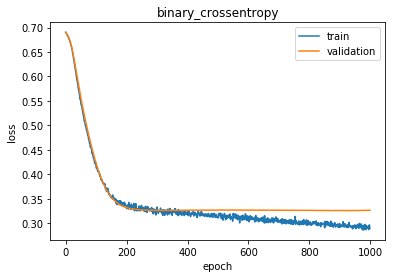

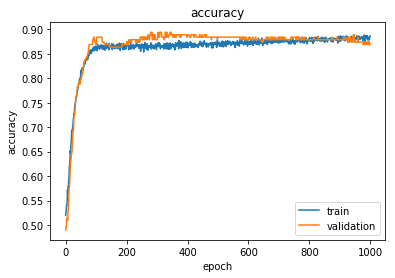

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'], loc='upper right')
plt.title('binary_crossentropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','validation'], loc='lower right')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [5]:
y_hat=model.predict(X_train)
y_hat=y_hat>0.5
confusion_matrix=sklearn.metrics.confusion_matrix(Y_train, y_hat)

In [6]:
confusion_matrix

array([[891, 109],
       [119, 881]])

In [7]:
data_raw=pd.read_csv('test.csv')
data_x=data_raw.sequence.values.tolist()
num_sample=len(data_x)
X_test=np.zeros([num_sample,seq_len*data_dim])
i=0
for sample in data_x:
    j=0
    for character in sample:
        if character == 'A':
            X_test[i,j*4+0]=1
        if character == 'C':
            X_test[i,j*4+1]=1
        if character == 'G':
            X_test[i,j*4+2]=1
        if character == 'T':
            X_test[i,j*4+3]=1
        j=j+1    
    i=i+1

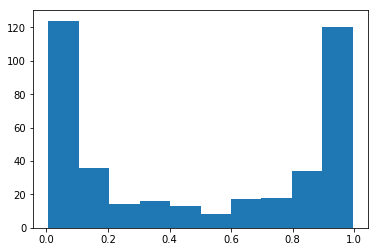

In [8]:
y_predict=model.predict(X_test)
y_predict=y_predict[:,0]
plt.hist(y_predict)
index=np.arange(len(y_predict))

In [9]:
y_predict.shape

(400,)

In [10]:
dataframe = pd.DataFrame({'id':index,'prediction':y_predict})
dataframe.to_csv("output_fcnn_onehot.csv",index=False,sep=',')